# Data Cleaning Challenge
***

In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv('./iris-data.csv')

### What is the purpose of this dataset ?

&rarr; Determine the type of iris specy based on its caracteristics : petal and sepal width and length.

### Overview on the dataset

In [3]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

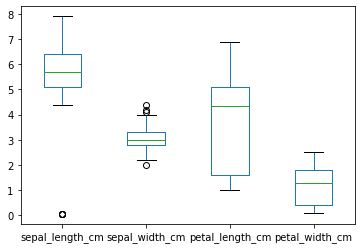

In [7]:
iris.plot.box()

* This dataset only contains 5 columns : 4 numerical, 1 categorical. In this case we want to keep as much info as we can.
* There are only 150 rows as well, so we'll try to correct the missing values instead of dropping the info.
* There is one outlier for the sepal_length that we might have to correct.
* We'll have to correct the names in the class columns as there are some typos and different names for the same flower species.

### 1. Correct the categorical names in 'Class'

In [8]:
iris['class'].value_counts()

#'Iris-setosa' and 'Iris-setossa' are meant for the same specy : iris setosa
# Same for 'Iris-versicolor' and 'versicolor' : iris versicolor

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [9]:
iris['class'] = iris['class'].replace('Iris-setossa', 'Iris-setosa')
iris['class'] = iris['class'].replace('versicolor', 'Iris-versicolor')
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 2. Deal with null values

In [10]:
iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [11]:
iris[iris['petal_width_cm'].isnull() == True]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


The null values all belong to the same type of iris. If there is a correlation between petal length and width, we might
be able to correct those null values with an approximation. The goal being to delete as little info as possible.

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.660905,0.094265,0.157609
sepal_width_cm,0.660905,1.000000,0.176695,0.264764
petal_length_cm,0.094265,0.176695,1.000000,0.332553
petal_width_cm,0.157609,0.264764,0.332553,1.000000


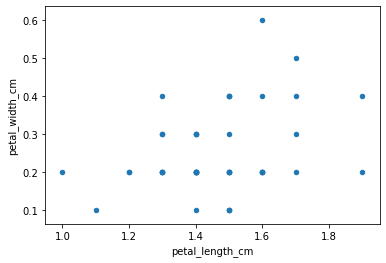

In [12]:
iris[iris['class'] == 'Iris-setosa'].plot.scatter(x='petal_length_cm', y='petal_width_cm')

"""For the Iris-setosa specy, the highest correlation with petal width is with petal length. 
We can use an approximation to dertermine our missing values.
"""
iris[iris['class'] == 'Iris-setosa'].corr()

In [13]:
mean1_5 = round(iris[(iris['class'] == 'Iris-setosa') & (iris['petal_length_cm'] == 1.5)]['petal_width_cm'].mean(skipna=True), 1)
mean1_4 = round(iris[(iris['class'] == 'Iris-setosa') & (iris['petal_length_cm'] == 1.4)]['petal_width_cm'].mean(skipna=True), 1)
mean1_6 = round(iris[(iris['class'] == 'Iris-setosa') & (iris['petal_length_cm'] == 1.6)]['petal_width_cm'].mean(skipna=True), 1)
#I calculate the mean for the petal width where the petal length is the same as the one where my values are missing.

In [14]:
iris[(iris['petal_length_cm']==1.5)] = iris[(iris['petal_length_cm']==1.5)].replace(to_replace = np.nan, value = mean1_5)
iris[(iris['petal_length_cm']==1.4)] = iris[(iris['petal_length_cm']==1.4)].replace(to_replace = np.nan, value = mean1_4)
iris[(iris['petal_length_cm']==1.6)] = iris[(iris['petal_length_cm']==1.6)].replace(to_replace = np.nan, value = mean1_6)

In [15]:
iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

### 3. Correct the outliers

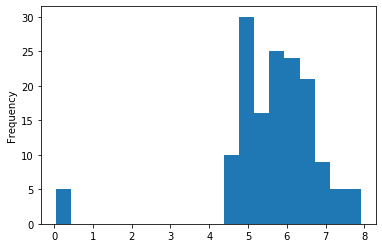

In [16]:
iris.sepal_length_cm.plot.hist(bins=20);
#5 values are very small, while all the others are > 4cm.

In [17]:
iris[iris['sepal_length_cm'] < 3]

#Considering that 50% of the values are between 5.4 and 6.1cm, it seems the values just need to me multiplied by 100.

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [18]:
iris['sepal_length_cm'] = iris['sepal_length_cm'].apply(lambda x: (x*100) if (x<3) else x)

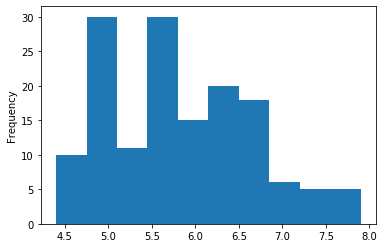

In [19]:
iris.sepal_length_cm.plot.hist();

In [20]:
iris.to_csv('./iris_clean.csv')